# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN


# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('../data/wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?

1) FRESH: annual spending (m.u.) on fresh products (Continuous);
2) MILK: annual spending (m.u.) on milk products (Continuous);
3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
4) FROZEN: annual spending (m.u.)on frozen products (Continuous);
5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
6) DELICATESSEN: annual spending (m.u.) on and delicatessen products (Continuous);
7) CHANNEL: customers Channel - Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal)
8) REGION: customers Region Lisnon, Oporto or Other (Nominal)

* Any categorical data to convert?

7) and 8) is already converted in our input

* Any missing data to remove?

Not at first sight

* Column collinearity - any high correlations?

Yes, strongest correlations coefficients are: [0.66 0.73 0.92] for ['Milk vs Deterg.', 'Milk vs Groc.', 'Groc. vs Deterg.'] 

* Descriptive statistics - any outliers to remove?

There are clear outliers in all distributions of numerical variables. However, these outliers are typical from the behavior of the customers dataset rather than error measurements, thus I will keep them in the first analysis and conclude after it if removal is necessary to get meaningful insights.

* Column-wise data distribution - is the distribution skewed?

Yes all numerical variables are skewed, which could resemble Pareto principle (the biggest customers, let's say about 20%, account for the vast majority of the sales, about 80%).

* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

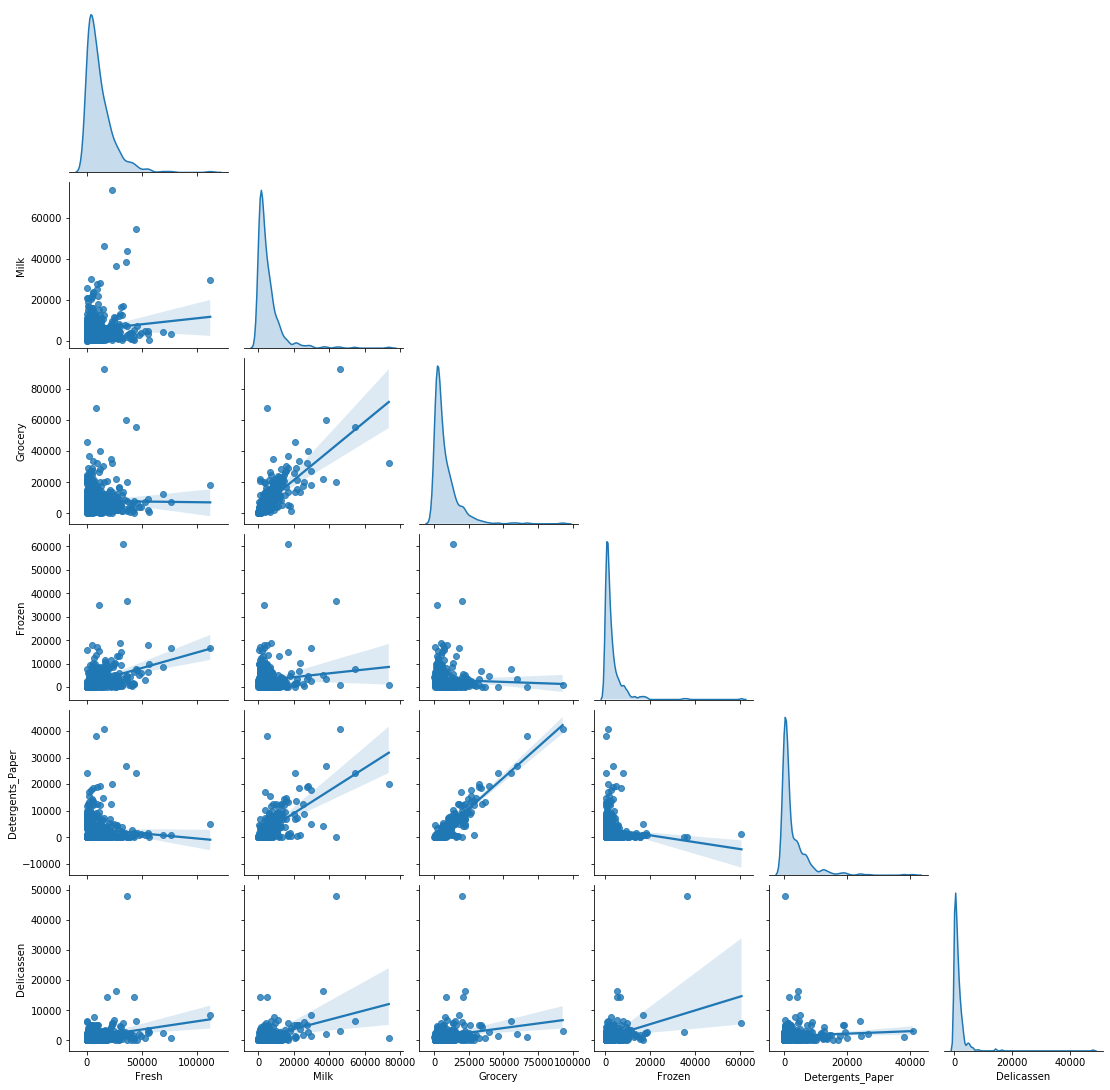

In [3]:
# Your code here:
# customers.info()
# customers.Delicassen.value_counts()
# check for negative values
# print((customers.Detergents_Paper < 0).sum())
# Your plots here
cust_numerical = customers.drop(columns=['Channel','Region'])
sns.pairplot(data = cust_numerical,kind='reg',diag_kind='kde',corner=True)

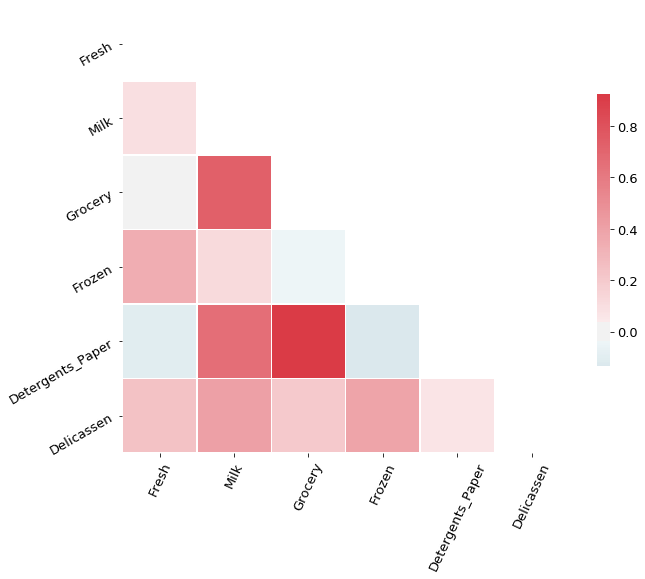

In [4]:
# Your code here:
# Compute the correlation matrix
corr = cust_numerical.corr()

max_corr = np.triu(corr,k=1).max()
min_corr = np.triu(corr,k=1).min()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
g = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=max_corr , vmin=min_corr, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(fontsize=13,rotation=65)
plt.yticks(fontsize=13,rotation=30)
# use matplotlib.colorbar.Colorbar object
cbar = g.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=13)


In [5]:
# Your code here:
print(f"Strongest correlations coefficients are: {np.sort(np.triu(corr,k=1).reshape(1,-1)[0])[-3:].round(2)}")

Strongest correlations coefficients are: [0.66 0.73 0.92]


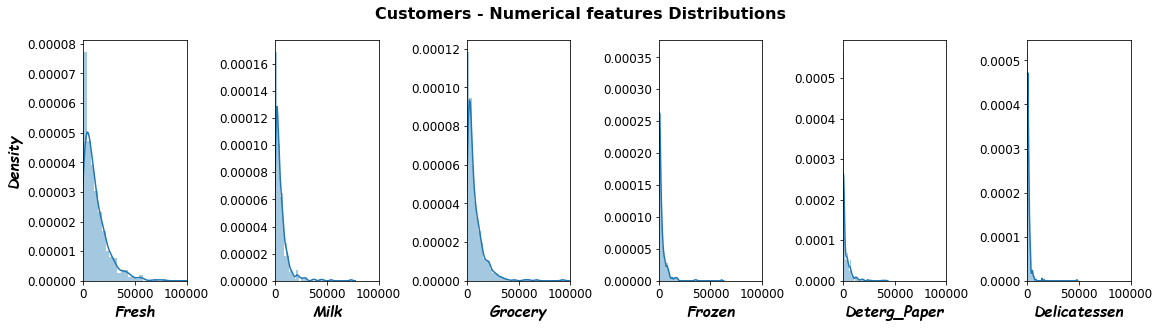

In [6]:
# Evaluate distributions with the same x-axis for all in a subplot
fig = plt.figure(figsize=[16,4],constrained_layout=True)
fig.suptitle('Customers - Numerical features Distributions', size=16, weight='bold',y=1.1)
spec = gridspec.GridSpec(ncols=6, nrows=1, figure=fig)
ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1])
ax3 = fig.add_subplot(spec[0, 2])
ax4 = fig.add_subplot(spec[0, 3])
ax5 = fig.add_subplot(spec[0, 4])
ax6 = fig.add_subplot(spec[0, 5])
sns.distplot(customers.Fresh,label='Fresh',ax=ax1)
sns.distplot(customers.Milk,label='Milk',ax=ax2)
sns.distplot(customers.Grocery,label='Grocery',ax=ax3)
sns.distplot(customers.Frozen,label='Frozen',ax=ax4)
sns.distplot(customers.Detergents_Paper,label='Deterg_Paper',ax=ax5)
sns.distplot(customers.Delicassen,label='Delicatessen',ax=ax6)

lab_list = ['Fresh','Milk','Grocery','Frozen','Deterg_Paper','Delicatessen']
ax_list = [ax1,ax2,ax3,ax4,ax5,ax6]

for i in range(6):
    plt.sca(ax_list[i])
    plt.xticks([0,50000,100000],fontsize=12)
    plt.xlim(0,100000)
    plt.yticks(fontsize=12)
    label_prop = {'size':15,'weight':'bold','family':'fantasy','style':'oblique'}
    plt.xlabel(lab_list[i],fontdict=label_prop)
    if i == 0:
        plt.ylabel('Density',fontdict=label_prop)

# ax1.hist(, align='mid', label='',bins=50,ec='w',fc='royalblue')

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

There are clear outliers in all distributions of numerical variables. However, these outliers are typical from the behavior of the customers dataset rather than error measurements, thus I will keep them in the first analysis and conclude after it if removal is necessary to get meaningful insights.

In [7]:
# Your code here
# Check if there are entries with all zeros or negative values
print(f"There are no entries with negative numeric values:\n{(cust_numerical < 0).sum()}")
print(f"There are {(cust_numerical == 0).sum(axis=1).sum()} entries with all zero entries.")

There are no entries with negative numeric values:
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64
There are 0 entries with all zero entries.


In [8]:
# Your comment here

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In particular the scaling will impact a lot if we want to include the converted categorical variables 'Channel' and 'Region'.

In [9]:
# Your code here:
scaler = StandardScaler()
customers_scale = scaler.fit_transform(customers)

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [10]:
# Your code here:

# important init paramters --> (n_clusters=8, init='k-means++', n_init=10)
kmeans = KMeans()
kmeans.fit(customers_scale)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
# assign labels from clustering to dataframe customers
customers['labels'] = kmeans.labels_
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,1


Count the values in `labels`. (The algorithm by default initializes in 8 clusters).

In [12]:
# Your code here:
customers.labels.value_counts()

0    175
1     93
4     87
2     41
7     36
5      5
6      2
3      1
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [13]:
# Your code here

# important init paramters --> (eps=0.5, min_samples=5, metric='euclidean')
cluster_dbscan = DBSCAN()
cluster_dbscan.fit(customers_scale)


DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [14]:
# assign labels from clustering dbscan to dataframe customers
customers['labels_DBSCAN'] = cluster_dbscan.labels_
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,1,-1
1,2,3,7057,9810,9568,1762,3293,1776,1,-1
2,2,3,6353,8808,7684,2405,3516,7844,1,-1
3,1,3,13265,1196,4221,6404,507,1788,0,1
4,2,3,22615,5410,7198,3915,1777,5185,1,-1


Count the values in `labels_DBSCAN`. (A clear difference vs. k-means is: no predefined number of clusters).

In [15]:
# Your code here
customers.labels_DBSCAN.value_counts()

-1    255
 1    130
 5     22
 4      7
 6      6
 2      5
 7      5
 3      5
 0      5
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

Text(0, 0.5, 'Milk')

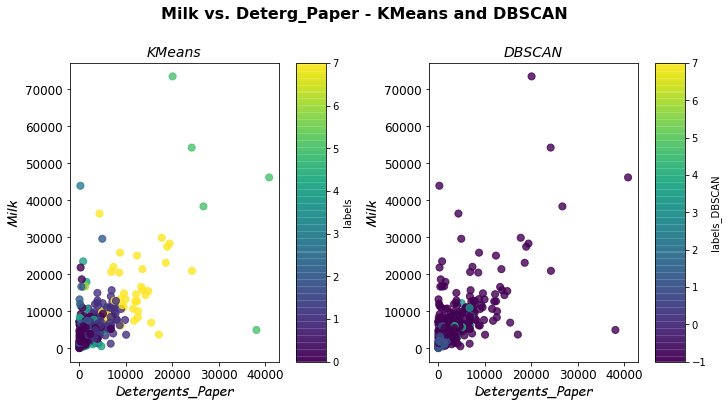

In [16]:
# Your code here:

fig = plt.figure(figsize=[10,5],constrained_layout=True)
fig.suptitle('Milk vs. Deterg_Paper - KMeans and DBSCAN', size=16, weight='bold',y=1.1)
spec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1])
subtitle_prop = {'size':14,'style':'oblique'}
ax1.set_title('KMeans',fontdict=subtitle_prop)
ax2.set_title('DBSCAN',fontdict=subtitle_prop)
label_prop = {'size':14,'family':'fantasy','style':'oblique'}

x_name = 'Detergents_Paper'
y_name = 'Milk'

plot_var = customers.plot.scatter(x_name,y_name,ax=ax1,s=50,c='labels',alpha=0.8,colormap='viridis')
plt.sca(plot_var)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(x_name,fontdict=label_prop)
plt.ylabel(y_name,fontdict=label_prop)
plot_var = customers.plot.scatter(x_name,y_name,ax=ax2,s=50,c='labels_DBSCAN',alpha=0.8,colormap='viridis')
plt.sca(plot_var)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(x_name,fontdict=label_prop)
plt.ylabel(y_name,fontdict=label_prop)


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

Text(0, 0.5, 'Fresh')

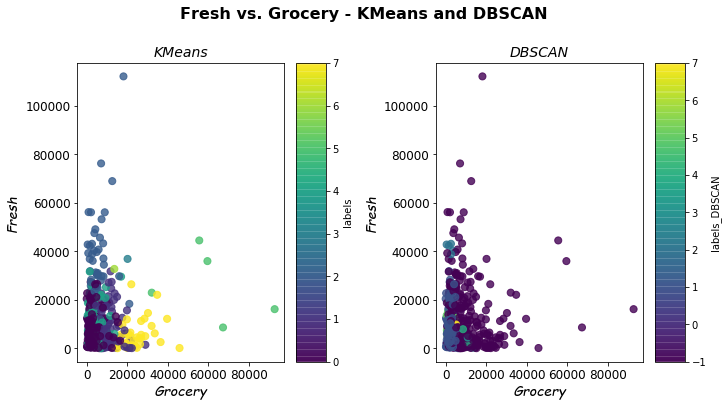

In [17]:
# Your code here:

fig = plt.figure(figsize=[10,5],constrained_layout=True)
fig.suptitle('Fresh vs. Grocery - KMeans and DBSCAN', size=16, weight='bold',y=1.1)
spec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1])
subtitle_prop = {'size':14,'style':'oblique'}
ax1.set_title('KMeans',fontdict=subtitle_prop)
ax2.set_title('DBSCAN',fontdict=subtitle_prop)
label_prop = {'size':14,'family':'fantasy','style':'oblique'}

x_name = 'Grocery'
y_name = 'Fresh'

plot_var = customers.plot.scatter(x_name,y_name,ax=ax1,s=50,c='labels',alpha=0.8,colormap='viridis')
plt.sca(plot_var)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(x_name,fontdict=label_prop)
plt.ylabel(y_name,fontdict=label_prop)
plot_var = customers.plot.scatter(x_name,y_name,ax=ax2,s=50,c='labels_DBSCAN',alpha=0.8,colormap='viridis')
plt.sca(plot_var)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(x_name,fontdict=label_prop)
plt.ylabel(y_name,fontdict=label_prop)


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

Text(0, 0.5, 'Delicatessen')

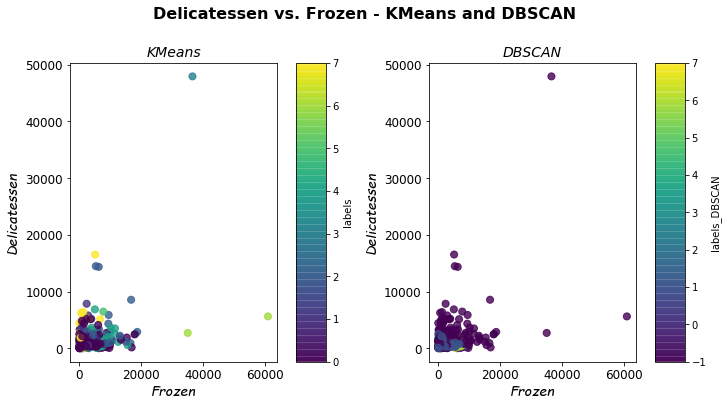

In [18]:
# Your code here:

fig = plt.figure(figsize=[10,5],constrained_layout=True)
fig.suptitle('Delicatessen vs. Frozen - KMeans and DBSCAN', size=16, weight='bold',y=1.1)
spec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig)
ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1])
subtitle_prop = {'size':14,'style':'oblique'}
ax1.set_title('KMeans',fontdict=subtitle_prop)
ax2.set_title('DBSCAN',fontdict=subtitle_prop)
label_prop = {'size':14,'family':'fantasy','style':'oblique'}

x_name = 'Frozen'
y_name = 'Delicassen'

plot_var = customers.plot.scatter(x_name,y_name,ax=ax1,s=50,c='labels',alpha=0.8,colormap='viridis')
plt.sca(plot_var)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(x_name,fontdict=label_prop)
plt.ylabel('Delicatessen',fontdict=label_prop)
plot_var = customers.plot.scatter(x_name,y_name,ax=ax2,s=50,c='labels_DBSCAN',alpha=0.8,colormap='viridis')
plt.sca(plot_var)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(x_name,fontdict=label_prop)
plt.ylabel('Delicatessen',fontdict=label_prop)


Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [19]:
# Your code here:
col_nums = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen','labels']
customers[col_nums].groupby('labels').agg('mean').round(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels,,,,,,
0,8816.38,2952.09,3427.15,2680.85,774.27,1006.75
1,8515.80,7525.02,11567.83,1362.86,4781.03,1420.70
2,39870.29,4916.85,5740.59,6566.93,901.27,2595.95
3,36847.00,43950.00,20170.00,36534.00,239.00,47943.00
4,10277.31,3237.28,4136.66,3211.43,907.34,1111.80
5,25603.00,43460.60,61472.20,2636.00,29974.20,2708.80
6,22015.50,9937.00,7844.00,47939.00,671.50,4153.50
7,5766.53,15820.94,24570.28,1709.03,11677.22,2491.17


In [20]:
# Your code here:
col_nums = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen','labels_DBSCAN']
customers[col_nums].groupby('labels_DBSCAN').agg('mean').round(2)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels_DBSCAN,,,,,,
-1,13729.56,8359.89,11484.36,3795.00,4356.80,2080.47
0,11401.00,3536.20,6729.00,720.20,3561.00,258.20
1,9128.82,1862.44,2423.53,2131.43,496.58,741.95
2,41446.60,1421.20,2167.60,1276.40,416.20,784.80
3,2357.20,10224.80,11862.80,609.60,5780.00,572.80
4,3068.14,6095.86,10355.00,994.00,4675.57,1826.43
5,9837.86,1751.86,2161.68,1513.18,333.95,669.05
6,6823.00,1943.00,2372.67,6780.33,386.50,613.67
7,7494.60,1537.60,3383.00,2575.40,227.40,941.00


Which algorithm appears to perform better?

In this particular case, what we observe is that most of the customers fall in the outlier classification for the DBSCAN. For that reason, it appears that the K-Means works better, showing in the plots a clearer sense of clustering.

What we know from DBSCAN algorithm is that whenever most of the entries are clustered as outliers, which is the present case, the reason is that the chosen parameter `eps` has been selected to be too small.


# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [21]:
# Your code here

In [22]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [23]:
# Your code here

In [24]:
# Your comment here